<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import csv
import copy, math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/ML/Lineardata_test.csv")
train = pd.read_csv("/content/drive/MyDrive/ML/Lineardata_train.csv")

In [ ]:
train.head()

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561


In [ ]:
test.head()

,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,14189,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,14742,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,13905,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,10072,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,14879,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556


In [ ]:
y = train.iloc[:, 0].values
print(y)

[ -5928.10274562   -738.89085527 -20186.84158668 ...  -8246.69722146
  -9101.10137698   3420.72986003]


In [ ]:
x = train.iloc[:, range(1,21)].values
print(x)

[[-9.00469588e-01  8.50978218e-01 -2.06952632e+00 ... -9.68452346e+00
   1.82118994e+01 -1.68484235e+01]
 [-2.66567434e-01  2.86549584e+00 -6.39677992e+00 ...  6.52914102e+00
  -4.57727939e+00  2.80805295e+01]
 [-5.89188588e-02  6.35366255e-01 -3.56321592e+00 ... -6.45143845e+00
  -1.70804082e+01 -1.35009528e+01]
 ...
 [-3.21084933e-01  1.60838573e+00 -1.11770995e+01 ... -4.29975339e+00
   1.60530318e+01  1.48127151e+01]
 [-2.38343160e+00  1.21491121e+00  9.25112877e-01 ... -5.08280126e+00
   7.51408869e+00  3.01504845e+01]
 [ 1.39653447e+00  1.04498367e+00  6.97468560e+00 ... -2.13494556e+00
   9.04293672e+01 -3.64122320e+01]]


In [ ]:
test_data = test.values
x_test = test_data[:, 1:]
print(x_test)

[[  0.63425968  -0.77172682   4.29769361 ...  21.38312261 -37.84185715
   18.89238477]
 [  0.45612837   3.15443342   0.18200559 ...  -1.20727899 -28.15418484
   -3.60374419]
 [  0.39081459  -5.2782841    1.62594277 ...   7.46680301  49.90465914
   46.99006168]
 ...
 [ -0.34993236   4.61195534  -2.81473526 ...  11.29402377   1.44193814
    4.39548236]
 [  0.29583261   1.82555163  -8.82473085 ... -16.09934402  10.74475735
    6.57869536]
 [ -0.55583739  -0.11103869  -0.47740673 ...  -9.31502593 -10.49082963
   13.28854002]]


In [ ]:
features = ["feature 1","feature 2","feature 3", "feature 4", "feature 5","feature 6", "feature 7", "feature 8", "feature 9", "feature 10","feature 11", "feature 12", "feature 13", "feature 14", "feature 15","feature 16", "feature 17", "feature 18", "feature 19", "feature 20"]

x_train = train[features]

y_train = train.target

array([ -5928.10274562,   -738.89085527, -20186.84158668, ...,
        -8246.69722146,  -9101.10137698,   3420.72986003])

# Woking Model

In [ ]:
def cost_function(x, y, w, b):
    m = len(y)
    f = np.dot(x, w) + b
    error = f - y
    target = np.sum(error**2) / (2 * m)
    return target

In [ ]:
def gradient_function(x, y, w, b):
    m = len(y)
    f = np.dot(x, w) + b
    dif = f - y
    dj_dw = np.dot(x.T, dif) / m
    dj_db = np.sum(dif) / m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w, b, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if i % (iterations // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return w, b, J_history


In [ ]:
x = train.iloc[:, range(1,21)].values
y = train.iloc[:, 0].values
w = np.zeros((x.shape[1],))
b = 0.
print(y)
print(x)
print(w)

[ -5928.10274562   -738.89085527 -20186.84158668 ...  -8246.69722146
  -9101.10137698   3420.72986003]
[[-9.00469588e-01  8.50978218e-01 -2.06952632e+00 ... -9.68452346e+00
   1.82118994e+01 -1.68484235e+01]
 [-2.66567434e-01  2.86549584e+00 -6.39677992e+00 ...  6.52914102e+00
  -4.57727939e+00  2.80805295e+01]
 [-5.89188588e-02  6.35366255e-01 -3.56321592e+00 ... -6.45143845e+00
  -1.70804082e+01 -1.35009528e+01]
 ...
 [-3.21084933e-01  1.60838573e+00 -1.11770995e+01 ... -4.29975339e+00
   1.60530318e+01  1.48127151e+01]
 [-2.38343160e+00  1.21491121e+00  9.25112877e-01 ... -5.08280126e+00
   7.51408869e+00  3.01504845e+01]
 [ 1.39653447e+00  1.04498367e+00  6.97468560e+00 ... -2.13494556e+00
   9.04293672e+01 -3.64122320e+01]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
iterations= 1000
alpha = 0.000035

w_final, b_final, J_hist = gradient_descent(x, y, w, b, alpha, iterations)

m = len(y)


Iteration    0: Cost 56745535.9030
Iteration  100: Cost 1130980.8846
Iteration  200: Cost 610024.2609
Iteration  300: Cost 378592.4852
Iteration  400: Cost 244338.6231
Iteration  500: Cost 160394.2482
Iteration  600: Cost 106620.8628
Iteration  700: Cost 71804.3371
Iteration  800: Cost 49089.2319
Iteration  900: Cost 34155.3292


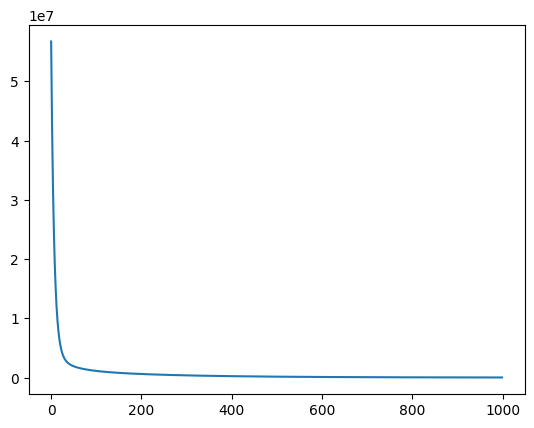

In [ ]:
rng = np.arange(0, iterations)
plt.plot(rng, J_hist)
plt.show()

In [ ]:
ycap= np.dot(x, w_final) + b_final
d1 = y - ycap
d2 = y - y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : 0.9996286738043445


In [ ]:
for i in range(5000):
  print(np.dot(x_test,w_final)[i])

-5648.1360477600465
17180.646445923958
4592.85827040481
2334.3304306487353
3625.1507396454817
25854.360353517983
24548.60675507431
2631.392160954878
-10099.310873489727
12555.675151394995
16709.81369640231
-7379.378435205295
-18473.041712682258
-7980.766960979675
-7717.157385622652
471.45185215422225
-9939.36156971748
5247.835293176355
14280.450459444432
-24025.385303836887
-10627.191658568492
24297.223588463676
-8377.192990403097
5633.735407324657
-5016.758807633849
9538.959827814313
12832.684615012298
-657.7980998643923
12739.730245915518
-3160.3649101599576
-2534.7559527469866
6521.776348937898
3119.008146740095
-12778.453514550016
-4399.5051915474505
-5779.85449644954
-3306.1737833383404
-7376.766933895866
-2148.41984438752
12439.73154680864
-1323.4849445007976
-24549.794586186104
-14632.482344901175
-11202.792101474448
-16.059173870538757
-19157.44910773152
9937.965278259953
12097.358202820482
-2342.7107252387186
-3157.535094216985
9752.61477431597
-2330.4179067376363
8753.6743558

# SKLearn

In [ ]:
features = ["feature 1","feature 2","feature 3", "feature 4", "feature 5","feature 6", "feature 7", "feature 8", "feature 9", "feature 10","feature 11", "feature 12", "feature 13", "feature 14", "feature 15","feature 16", "feature 17", "feature 18", "feature 19", "feature 20"]

x_train = train[features]

y_train = train.target

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ml_model = LinearRegression()
ml_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
b = ml_model.intercept_
w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20 = ml_model.coef_
b, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20

(22.000619519308593,
 21.999889606829615,
 11.000027871693675,
 2.000047296069883,
 3.0000939454691196,
 43.999927797312395,
 54.99996600130372,
 22.999939416507534,
 44.99999242137104,
 22.99995920753584,
 11.999957916100557,
 10.999936267316336,
 200.00006626478273,
 67.0000090082961,
 82.00003824684708,
 12.000013964096134,
 44.99999851543446,
 23.00004631445455,
 44.999994331760774,
 88.00000635602228,
 10.000008493403072)

# LinAlg(Advanced)

In [ ]:
X = []
Y = []

In [ ]:
with open('/content/Lineardata_train.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    next(csvreader)

    for line in csvreader:
        y, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20 = map(float, line)
        X.append([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20])
        Y.append(y)

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X

array([[-9.00469588e-01,  8.50978218e-01, -2.06952632e+00, ...,
        -9.68452346e+00,  1.82118994e+01, -1.68484235e+01],
       [-2.66567434e-01,  2.86549584e+00, -6.39677992e+00, ...,
         6.52914102e+00, -4.57727939e+00,  2.80805295e+01],
       [-5.89188588e-02,  6.35366255e-01, -3.56321592e+00, ...,
        -6.45143845e+00, -1.70804082e+01, -1.35009528e+01],
       ...,
       [-3.21084933e-01,  1.60838573e+00, -1.11770995e+01, ...,
        -4.29975339e+00,  1.60530318e+01,  1.48127151e+01],
       [-2.38343160e+00,  1.21491121e+00,  9.25112877e-01, ...,
        -5.08280126e+00,  7.51408869e+00,  3.01504845e+01],
       [ 1.39653447e+00,  1.04498367e+00,  6.97468560e+00, ...,
        -2.13494556e+00,  9.04293672e+01, -3.64122320e+01]])

In [ ]:
Y

array([ -5928.10274562,   -738.89085527, -20186.84158668, ...,
        -8246.69722146,  -9101.10137698,   3420.72986003])

In [ ]:
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
Ycap = np.dot(X,w)

In [ ]:
d1 = Y - Ycap
d2 = Y - Y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : 0.9999963073069313


In [ ]:
with open('/content/Lineardata_test.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    next(csvreader)

    for line in csvreader:
        x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20 = map(float, line)
        X.append([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20])

# Failed model-1

In [ ]:
def cost_function(x, y, w, b):

  m = x.shape[0]
  target = 0.0

  for i in range(m):
    f_i = np.dot(x[i], w) + b

    target = target + (f_i - y[i])**2

  target = target/(2*m )

  #target = np.sum(((x.dot(w)+b - y)**2)/(2*m))

  return target

In [ ]:
def gradient_function(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        dif = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + dif * x[i, j]
        dj_db = dj_db + dif

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_calculation, gradient_calculation, alpha, iterations):
  J_history = []
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range(iterations):
    dj_dw, dj_db = gradient_calculation(x, y, w, b)

    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if i <100000:
      J_history.append(cost_calculation(x, y, w, b))

    if i% math.ceil(iterations / 10) == 0:
      print(f"Iteration{i:4d}: Target {J_history[-1]:8.2f} ")

  return w, b, J_history

In [ ]:
w = np.zeros(20,)

b = 0.

print(w)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
iterations= 1000
alpha = 0.001

w_final, b_final, J_hist = gradient_descent(x, y, w, b, cost_function, gradient_function, alpha, iterations)

# Failed model-2

In [ ]:
class LinearRegression():

  def __init__(self, alpha, iterations):
    self.alpha = alpha
    self.iterations = iterations

  def fit(self,x,y):
    self.m,self.n = x.shape

    self.w = np.zeros((self.n,1))
    self.b =0
    self.x = x
    self.y = y

    for i in range(self.iterations):
      self.update_w()

  def update_w(self):
    f_i = self.predict(self.x)

    dw = -((self.x.T).dot(self.x - f_i))/self.m

    db = -np.sum(self.y - f_i)/self.m

    self.w = self.w - self.alpha * dw
    self.b = self.b - self.alpha * db

  def predict(self, X):
      return np.dot(x,self.w) + self.b

  def print_values(self):
      print('W for the respective features are :')
      print(self.w)
      print()

      print('B for the regression is ', self.b)



In [ ]:
target = LinearRegression(alpha=0.01,iterations=1000)
target.fit(x,y)
target.print_values

# Failed model-3

In [ ]:
def model(x,y, alpha, iterations):
  m=y.size
  w = np.zeros((x.shape[1],1))
  # b = 0.
  J_history = []

  for i in range(iterations):
     f_i = np.dot(x,w)

     dif = f_i - y

     target = (1/(2*m))*np.sum(np.square(dif))

     dj_dw = (1/m)*np.dot(x.T, dif)
     w = w - alpha*dj_dw

    #  dj_db = (1/m)*dif
    #  b = b - alpha*dj_db

     J_history.append(target)

  if i% math.ceil(iterations / 10) == 0:
    print(f"Target:", target)

  return w,J_history

In [ ]:
w,J_history = model(x,y, alpha, iterations)